### GMM

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.mixture import GaussianMixture 

iris = datasets.load_iris()   
X = iris.data[:, :2]  
df = pd.DataFrame(X) 
df.head()

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


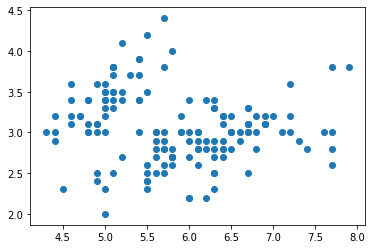

In [11]:
plt.scatter(df[0], df[1]) 

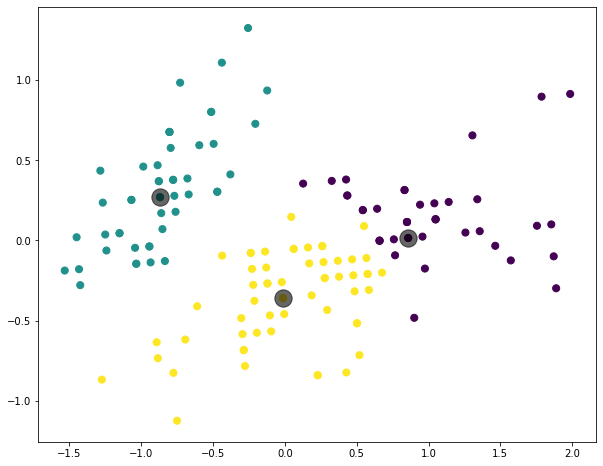

In [20]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df)
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)

centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [25]:
print("GMM weights: ", gmm.weights_)
print("GMM means: ", gmm.means_)
print("GMM Covariance: ", gmm.covariances_)

GMM weights:  [0.28816755 0.32452822 0.38730423]
GMM means:  [[ 0.84728552  0.0446827 ]
 [-0.85863445  0.3224865 ]
 [ 0.08905382 -0.3034619 ]]
GMM Covariance:  [[[0.34900895 0.0729688 ]
  [0.0729688  0.1001431 ]]

 [[0.10453045 0.08712486]
  [0.08712486 0.1338634 ]]

 [[0.26078943 0.10357866]
  [0.10357866 0.11060894]]]


In [31]:
print("Converged log-likelihood")
print(gmm.lower_bound_) 
print("-----------------------------")
print("Total iterations:")
print(gmm.n_iter_) 

Converged log-likelihood
-1.4985672470486961
-----------------------------
Total iterations:
8


### Adaboost

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [52]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


### Bagging

In [61]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor

In [62]:
def create_lagged_series(symbol, start_date, end_date, lags=3):
    ts = web.DataReader(
        symbol, "yahoo", start_date, end_date
    )
    tslag = pd.DataFrame(index=ts.index)
    tslag["Today"] = ts["Adj Close"]
    tslag["Volume"] = ts["Volume"]
    for i in range(0,lags):
        tslag["Lag%s" % str(i+1)] = ts["Adj Close"].shift(i+1)
    tsret = pd.DataFrame(index=tslag.index)
    tsret["Volume"] = tslag["Volume"]
    tsret["Today"] = tslag["Today"].pct_change()*100.0
    for i in range(0,lags):
        tsret["Lag%s" % str(i+1)] = tslag[
            "Lag%s" % str(i+1)
        ].pct_change()*100.0
    tsret = tsret[tsret.index >= start_date]
    return tsret

In [77]:
random_state = 15
n_jobs = 1  # Parallelisation factor for bagging, random forests
n_estimators = 1000
step_factor = 10
axis_step = int(n_estimators/step_factor)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state)

In [79]:
estimators = np.zeros(axis_step)
bagging_mse = np.zeros(axis_step)
rf_mse = np.zeros(axis_step)
boosting_mse = np.zeros(axis_step)

In [80]:
for i in range(0, axis_step):
    print("Bagging Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    bagging = BaggingRegressor(
        DecisionTreeRegressor(), 
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bagging.predict(X_test))
    estimators[i] = step_factor*(i+1)
    bagging_mse[i] = mse

Bagging Estimator: 10 of 1000...
Bagging Estimator: 20 of 1000...
Bagging Estimator: 30 of 1000...
Bagging Estimator: 40 of 1000...
Bagging Estimator: 50 of 1000...
Bagging Estimator: 60 of 1000...
Bagging Estimator: 70 of 1000...
Bagging Estimator: 80 of 1000...
Bagging Estimator: 90 of 1000...
Bagging Estimator: 100 of 1000...
Bagging Estimator: 110 of 1000...
Bagging Estimator: 120 of 1000...
Bagging Estimator: 130 of 1000...
Bagging Estimator: 140 of 1000...
Bagging Estimator: 150 of 1000...
Bagging Estimator: 160 of 1000...
Bagging Estimator: 170 of 1000...
Bagging Estimator: 180 of 1000...
Bagging Estimator: 190 of 1000...
Bagging Estimator: 200 of 1000...
Bagging Estimator: 210 of 1000...
Bagging Estimator: 220 of 1000...
Bagging Estimator: 230 of 1000...
Bagging Estimator: 240 of 1000...
Bagging Estimator: 250 of 1000...
Bagging Estimator: 260 of 1000...
Bagging Estimator: 270 of 1000...
Bagging Estimator: 280 of 1000...
Bagging Estimator: 290 of 1000...
Bagging Estimator: 300 

In [81]:
for i in range(0, axis_step):
    print("Random Forest Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    rf = RandomForestRegressor(
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    rf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, rf.predict(X_test))
    estimators[i] = step_factor*(i+1)
    rf_mse[i] = mse

Random Forest Estimator: 10 of 1000...
Random Forest Estimator: 20 of 1000...
Random Forest Estimator: 30 of 1000...
Random Forest Estimator: 40 of 1000...
Random Forest Estimator: 50 of 1000...
Random Forest Estimator: 60 of 1000...
Random Forest Estimator: 70 of 1000...
Random Forest Estimator: 80 of 1000...
Random Forest Estimator: 90 of 1000...
Random Forest Estimator: 100 of 1000...
Random Forest Estimator: 110 of 1000...
Random Forest Estimator: 120 of 1000...
Random Forest Estimator: 130 of 1000...
Random Forest Estimator: 140 of 1000...
Random Forest Estimator: 150 of 1000...
Random Forest Estimator: 160 of 1000...
Random Forest Estimator: 170 of 1000...
Random Forest Estimator: 180 of 1000...
Random Forest Estimator: 190 of 1000...
Random Forest Estimator: 200 of 1000...
Random Forest Estimator: 210 of 1000...
Random Forest Estimator: 220 of 1000...
Random Forest Estimator: 230 of 1000...
Random Forest Estimator: 240 of 1000...
Random Forest Estimator: 250 of 1000...
Random Fo

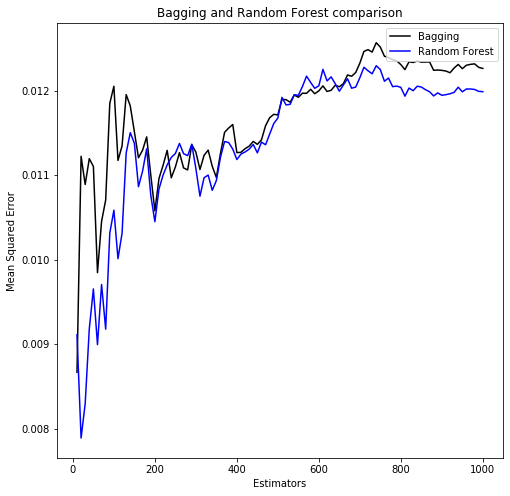

In [84]:
plt.figure(figsize=(8, 8))
plt.title('Bagging and Random Forest comparison')
plt.plot(estimators, bagging_mse, 'b-', color="black", label='Bagging')
plt.plot(estimators, rf_mse, 'b-', color="blue", label='Random Forest')
plt.legend(loc='upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()

### PCA for dimensionality reduction

In [85]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=0
)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [87]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

cumulative variance [0.36951469 0.55386396 0.67201555 0.74535807 0.80957914 0.86009639
 0.89964293 0.92608211 0.9499753  0.96627144 0.98007165 0.99179391
 1.        ]


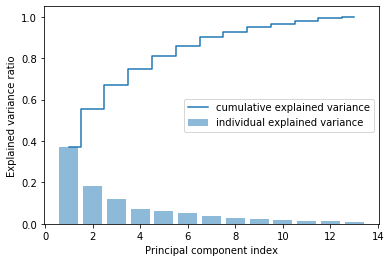

In [127]:
import matplotlib.pyplot as plt
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("cumulative variance",cum_var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [89]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [90]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [91]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [92]:
X_train_pca = X_train_std.dot(w)

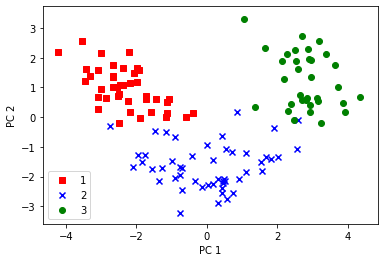

In [93]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print('Original number of features:', df_wine.shape)
print('Reduced number of features:', X_train_pca.shape)
lr.fit(X_train_pca, y_train)

Original number of features: (178, 14)
Reduced number of features: (124, 2)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

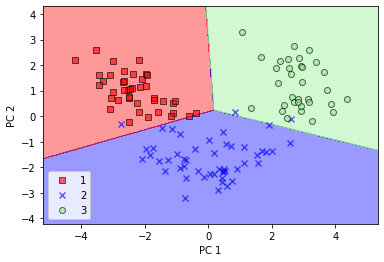

In [95]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)# plot decision regions for training set


plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [130]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

### balanced

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.697796 (0.061537)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


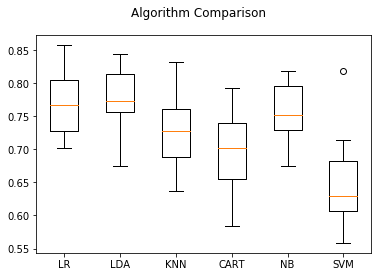

In [132]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [18]:
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
  
# load the data set 
data = pd.read_csv('creditcard.csv') 
  
# print info about columns in the dataframe 
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [19]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1)) 
  
# drop Time and Amount columns as they are not relevant for prediction purpose  
data = data.drop(['Time', 'Amount'], axis = 1) 
  
# as you can see there are 492 fraud transactions. 
data['Class'].value_counts() 

0    284315
1       492
Name: Class, dtype: int64

In [21]:
print(data.head())
X=data.iloc[:,:28]
y=data.iloc[:,28]

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class  normAmount  
0  0.

In [22]:
X['normAmount']=data['normAmount']
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [23]:
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
  
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


In [24]:
y_train.shape

(199364,)

In [25]:
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [26]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression


seed = 999

creditcard = pd.read_csv('creditcard.csv')
creditcard.columns = [x.lower() for x in creditcard.columns]
creditcard.rename(columns = {'class': 'fraud'}, inplace = True)

In [100]:
creditcard.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [101]:
creditcard.fraud.value_counts(dropna = False)

0    284315
1       492
Name: fraud, dtype: int64

In [102]:
creditcard.groupby('fraud').amount.mean()

fraud
0     88.291022
1    122.211321
Name: amount, dtype: float64

In [103]:
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()
def prep_data(df):
    X = df.iloc[:, 1:29].values
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 30].values
    y=np.array(y).astype(np.float)
    return X,y

In [104]:
X, y = prep_data(creditcard)

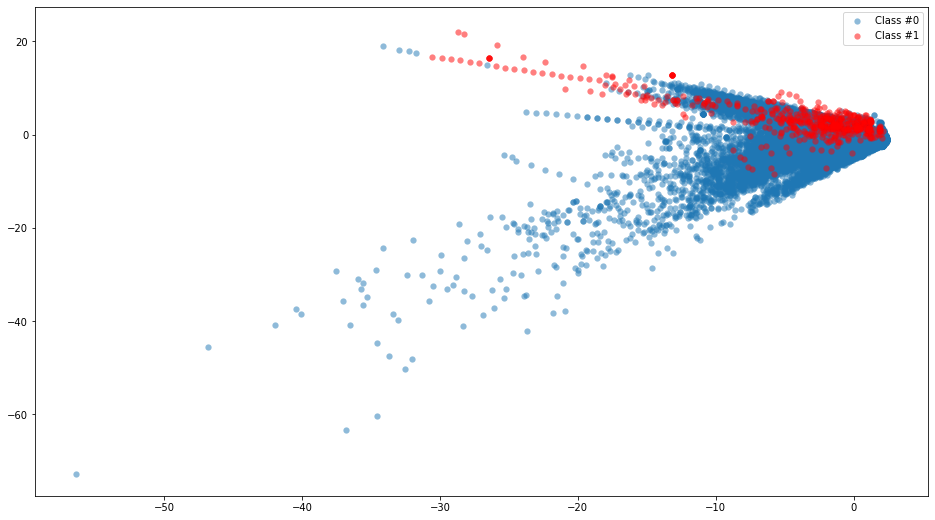

In [106]:
plot_data(X, y)

In [107]:
creditcard.drop(columns = 'time', inplace = True)

# Normalize the 'amount' column
scaler = StandardScaler()
creditcard['amount'] = scaler.fit_transform(creditcard['amount'].values.reshape(-1, 1))
# creditcard.drop(columns = 'amount', inplace = True)

X = creditcard.iloc[:, :-1]
y = creditcard.iloc[:, -1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .33, stratify = y, random_state = seed)

In [108]:
logitreg_parameters = {'C': np.power(10.0, np.arange(-3, 3))}
logitreg_grid = LogisticRegression(verbose = 3, warm_start = True)

logitreg_grid.fit(Xtrain, ytrain)
predictions = logitreg_grid.predict(Xtest)
print(classification_report(ytest, predictions))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.85      0.65      0.74       162

    accuracy                           1.00     93987
   macro avg       0.93      0.82      0.87     93987
weighted avg       1.00      1.00      1.00     93987



In [109]:
from imblearn.over_sampling import SMOTE
method = SMOTE()

In [110]:
X_resampled, y_resampled = method.fit_sample(X, y)

In [132]:
X_resampled.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [112]:
y_resampled.value_counts()

1    284315
0    284315
Name: fraud, dtype: int64

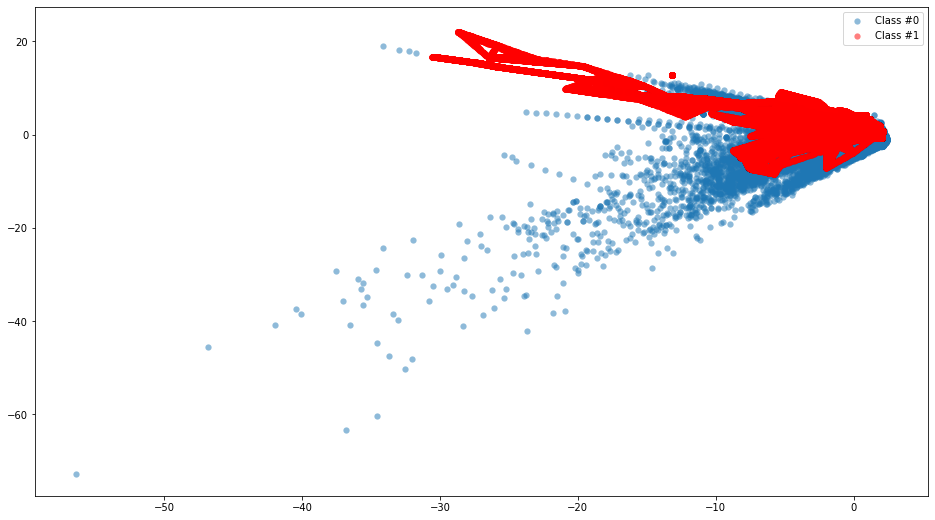

In [129]:
def plot_data(X, Y, y):
    plt.scatter(X[y == 0], Y[y == 0], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1], Y[y == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()
plot_data(X_resampled.iloc[:,0], X_resampled.iloc[:,1], y_resampled)

In [130]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 0)

In [131]:
lr = LogisticRegression() 
lr.fit(X_train, y_train) 
predictions = lr.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85172
           1       0.97      0.92      0.94     85417

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

